In [2]:
url = "http://www.gutenberg.org/files/2701/2701-h/2701-h.htm"

In [3]:
import requests;

In [4]:
#GET THE TEXT FROM THE URL
text = requests.get(url)

In [5]:
type(text)

requests.models.Response

In [6]:
html = text.text

In [7]:
from bs4 import BeautifulSoup as bs

In [8]:
#parts the html with the parser here we are using 'html5lib' parse
soup = bs(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [14]:
soup.findAll('a')[0:10]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>,
 <a href="#link2HCH0007"> CHAPTER 7. The Chapel. </a>,
 <a href="#link2HCH0008"> CHAPTER 8. The Pulpit. </a>]

In [15]:
text=soup.get_text()
print(text)

ï»¿




  
    
      Moby Dick; Or the Whale, by Herman Melville
    
    

    body { background:#ffffff; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2      { margin-left: 20%;}
    div.fig    { display:block; margin:0 auto; text-align:center; }
    div.middle { margin-left: 20%; margin-right: 20%; text-align: justify; }
    .figleft   {float: left; margin-left: 0%; margin-right: 1%;}
 

In [17]:
import re
tokens = re.findall(r'\w+', text)
tokens[:8]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman']

In [18]:
from nltk.tokenize import RegexpTokenizer

In [19]:
tokenizer = RegexpTokenizer("\w+")
tokens = tokenizer.tokenize(text)
tokens[:8]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman']

In [20]:
from nltk.corpus import stopwords

In [21]:
words = []
for word in tokens:
    words.append(word.lower())

words[:8]

['ï', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman']

In [22]:
sw = stopwords.words('english')

In [23]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [24]:
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)
words_ns[:8]

['ï', 'moby', 'dick', 'whale', 'herman', 'melville', 'body', 'background']

In [25]:
from collections import Counter
Counter(words_ns)

Counter({'ï': 1,
         'moby': 91,
         'dick': 91,
         'whale': 1246,
         'herman': 5,
         'melville': 5,
         'body': 111,
         'background': 5,
         'ffffff': 1,
         'color': 7,
         'black': 93,
         'margin': 31,
         'left': 80,
         '15': 6,
         'right': 168,
         'text': 18,
         'align': 7,
         'justify': 4,
         'p': 3,
         'indent': 2,
         '1em': 1,
         'top': 72,
         '25em': 2,
         'bottom': 57,
         'h1': 1,
         'h2': 1,
         'h3': 1,
         'h4': 1,
         'h5': 1,
         'h6': 1,
         'center': 3,
         'hr': 1,
         'width': 4,
         '50': 4,
         'foot': 34,
         '20': 10,
         '3em': 1,
         'font': 8,
         'size': 17,
         '90': 5,
         'blockquote': 1,
         '100': 6,
         '0': 8,
         'mynote': 1,
         'dde': 1,
         '000': 22,
         'padding': 2,
         '5em': 1,
         '10': 10

In [26]:
common_words = Counter(words_ns)

In [27]:
most_common = common_words.most_common()

In [28]:
len(words_ns)

113442

In [29]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
feqdist = nltk.FreqDist(common_words)

In [31]:
plt.figure(figsize=(20,20))
sns.set()

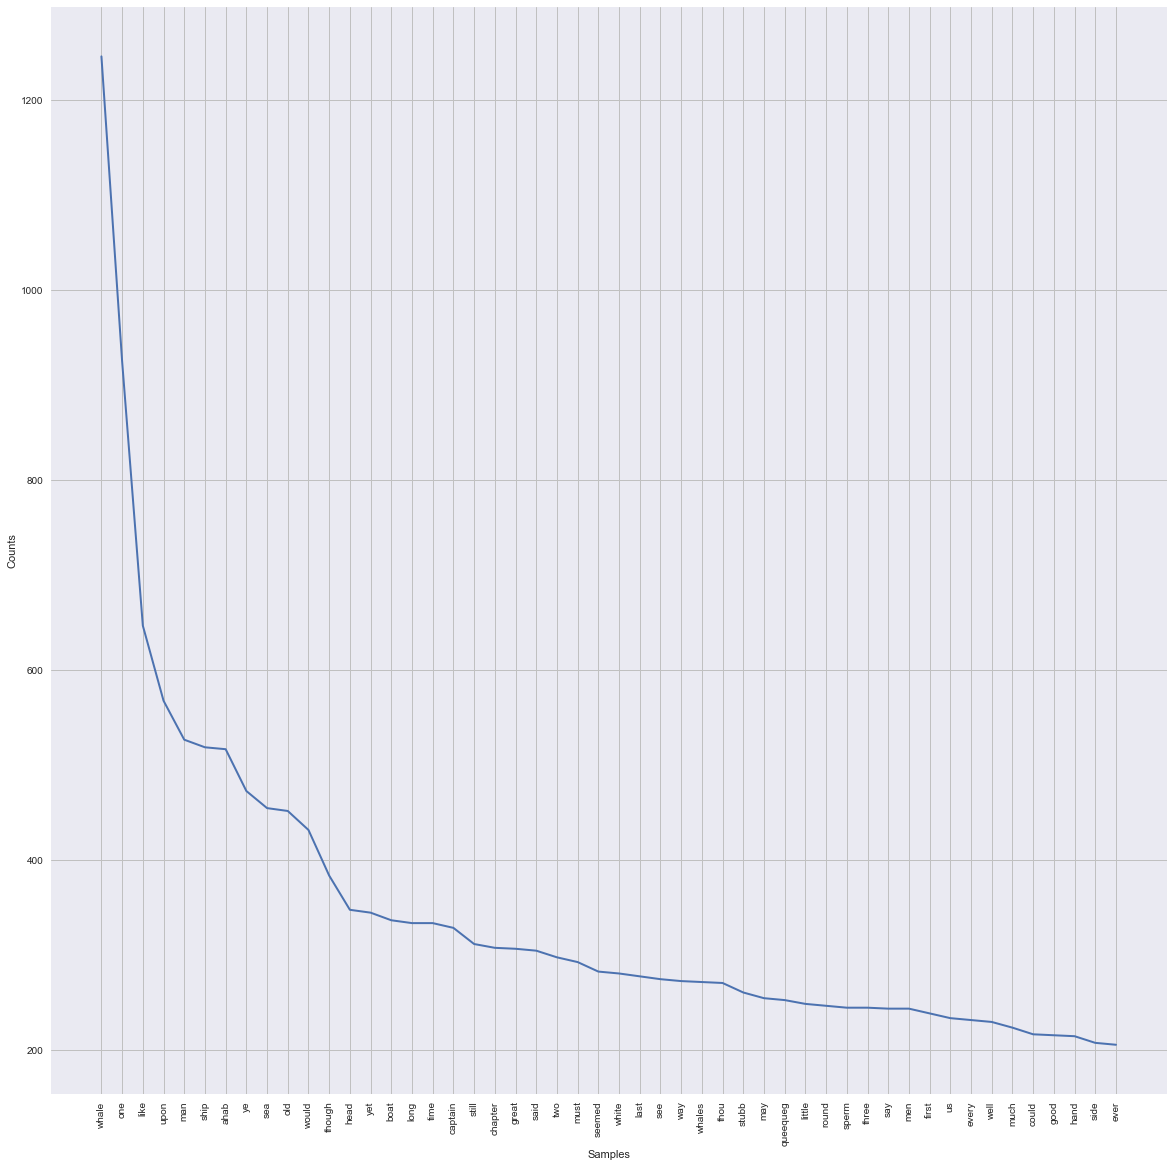

In [32]:
feqdist.plot(50)

In [37]:
from gensim.corpora.dictionary import Dictionary

In [38]:
from nltk.tokenize import word_tokenize

In [39]:
dictionary = Dictionary([words_ns])

In [40]:
print(dictionary.token2id)

{'0': 0, '000': 1, '1': 2, '10': 3, '100': 4, '101': 5, '102': 6, '103': 7, '104': 8, '105': 9, '106': 10, '107': 11, '108': 12, '109': 13, '11': 14, '110': 15, '111': 16, '112': 17, '113': 18, '114': 19, '115': 20, '116': 21, '117': 22, '118': 23, '119': 24, '12': 25, '120': 26, '121': 27, '122': 28, '123': 29, '124': 30, '125': 31, '126': 32, '127': 33, '128': 34, '129': 35, '13': 36, '130': 37, '131': 38, '132': 39, '133': 40, '134': 41, '135': 42, '14': 43, '144': 44, '1492': 45, '15': 46, '150': 47, '1500': 48, '15th': 49, '16': 50, '1652': 51, '1668': 52, '1671': 53, '1690': 54, '1695': 55, '16th': 56, '17': 57, '1726': 58, '1729': 59, '1750': 60, '1772': 61, '1775': 62, '1776': 63, '1778': 64, '1779': 65, '1788': 66, '1791': 67, '1793': 68, '18': 69, '180': 70, '1807': 71, '1819': 72, '1820': 73, '1821': 74, '1825': 75, '1828': 76, '1833': 77, '1836': 78, '1839': 79, '1840': 80, '1842': 81, '1846': 82, '1850': 83, '1851': 84, '1887': 85, '19': 86, '1em': 87, '1st': 88, '2': 89, 

In [41]:
dictionary.token2id.get('aback')

208

Create Corpus

In [42]:
corpus = [dictionary.doc2bow(words) for word in [words_ns]]

In [43]:
len(corpus[0][:10])

10

In [44]:
corpus

[[(0, 8),
  (1, 22),
  (2, 52),
  (3, 10),
  (4, 6),
  (5, 2),
  (6, 2),
  (7, 2),
  (8, 2),
  (9, 2),
  (10, 2),
  (11, 2),
  (12, 2),
  (13, 2),
  (14, 2),
  (15, 2),
  (16, 2),
  (17, 2),
  (18, 2),
  (19, 2),
  (20, 2),
  (21, 2),
  (22, 2),
  (23, 2),
  (24, 2),
  (25, 2),
  (26, 2),
  (27, 2),
  (28, 2),
  (29, 2),
  (30, 2),
  (31, 2),
  (32, 2),
  (33, 2),
  (34, 2),
  (35, 2),
  (36, 4),
  (37, 2),
  (38, 2),
  (39, 2),
  (40, 2),
  (41, 2),
  (42, 2),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 6),
  (47, 2),
  (48, 1),
  (49, 2),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 2),
  (71, 2),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 3),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 2),
  (89, 7),
  (90, 10),
  (91